In [11]:
import pandas as pd

In [12]:
#load dataset
df = pd.read_csv(r"E:\pkr\ML\batting_summary.csv")

In [13]:
# To get the first 5 rows of the data
df.head()

,Match_no,Match_Between,Team_Innings,Batsman_Name,Batting_Position,Dismissal,Runs,Balls,4s,6s,Strike_Rate
0,1,England vs New Zealand,England,Jonny Bairstow,1,c Daryl Mitchell b Mitchell Santner,33,35,4,1,94.300
1,1,England vs New Zealand,England,Dawid Malan,2,c Tom Latham b Matt Henry,14,24,2,0,58.300
2,1,England vs New Zealand,England,Joe Root,3,b Glenn Phillips,77,86,4,1,89.500
3,1,England vs New Zealand,England,Harry Brook,4,c Devon Conway b Rachin Ravindra,25,16,4,1,156.300
4,1,England vs New Zealand,England,Moeen Ali,5,b Glenn Phillips,11,17,1,0,64.700


In [14]:
# To get the summaryof the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Match_no          916 non-null    int64 
 1   Match_Between     916 non-null    object
 2   Team_Innings      916 non-null    object
 3   Batsman_Name      916 non-null    object
 4   Batting_Position  916 non-null    int64 
 5   Dismissal         914 non-null    object
 6   Runs              916 non-null    int64 
 7   Balls             916 non-null    int64 
 8   4s                916 non-null    int64 
 9   6s                916 non-null    int64 
 10  Strike_Rate       916 non-null    object
dtypes: int64(6), object(5)
memory usage: 78.8+ KB


In [45]:
# Convert Strike_Rate to numeric, coercing errors to NaN
df['Strike_Rate'] = pd.to_numeric(df['Strike_Rate'], errors='coerce')
# Fill missing Strike_Rate values with mean of the column
strike_rate_mean = df['Strike_Rate'].mean()
df['Strike_Rate'] = df['Strike_Rate'].fillna(strike_rate_mean)
print("Missing Strike Rate values after filling:", df['Strike_Rate'].isna().sum())
df.dtypes

Missing Strike Rate values after filling: 0


Match_no              int64
Match_Between        object
Team_Innings         object
Batsman_Name         object
Batting_Position      int64
Dismissal            object
Runs                  int64
Balls                 int64
4s                    int64
6s                    int64
Strike_Rate         float64
Predicted_Runs      float64
dtype: object

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

features = ['Batting_Position', 'Balls', '4s', '6s', 'Strike_Rate']
target = 'Runs'
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
# Predict on test data
y_pred = model.predict(X_test)
# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2*100}")

df['Predicted_Runs'] = model.predict(df[features])
df[['Batsman_Name', 'Runs', 'Predicted_Runs']].head(20)

Mean Squared Error: 21.172394125156934
R2 Score: 97.69456472453454


,Batsman_Name,Runs,Predicted_Runs
0,Jonny Bairstow,33,35.416224
1,Dawid Malan,14,16.271136
2,Joe Root,77,64.230712
3,Harry Brook,25,27.661663
4,Moeen Ali,11,10.112988
5,Jos Buttler,43,40.040771
6,Liam Livingstone,20,20.684697
7,Sam Curran,14,9.072616
8,Chris Woakes,11,9.219300
9,Adil Rashid,15,13.252699


In [ ]:
kohli_df = df[df['Batsman_Name'] == 'Virat Kohli']
kohli_df[['Batsman_Name', 'Runs', 'Predicted_Runs']]

,Batsman_Name,Runs,Predicted_Runs
84,Virat Kohli,85,81.213668
158,Virat Kohli,55,48.547753
269,Virat Kohli,16,17.409894
364,Virat Kohli,103,94.179258
440,Virat Kohli,95,92.744704
580,Virat Kohli,0,-0.263294
650,Virat Kohli,88,85.598984
719,Virat Kohli,101,97.140925
867,Virat Kohli,51,50.719305
884,Virat Kohli,117,101.389768


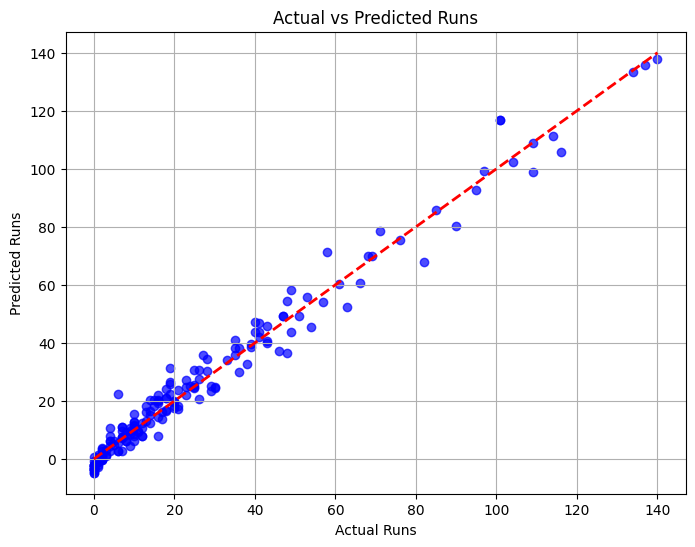

In [32]:
import matplotlib.pyplot as plt

# Actual vs Predicted Runs scatter plot
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)  # Diagonal line
plt.xlabel('Actual Runs')
plt.ylabel('Predicted Runs')
plt.title('Actual vs Predicted Runs')
plt.grid(True)
plt.show()